# **Proyecto 2 y 3**
El propósito de este proyecto es que los estudiantes apliquen los conocimientos adquiridos en análisis exploratorio de datos, normalización y limpieza de datos y modelos de aprendizaje automático.

## Importacion de librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree


En este proyecto se utilizaran 3 criptomonedas, se unifican en un solo dataframe para mejor manejo.

In [3]:
df1 = pd.read_csv('./crypto_currencies/coin_Bitcoin.csv')
df2 = pd.read_csv('./crypto_currencies/coin_Litecoin.csv')
df3 = pd.read_csv('./crypto_currencies/coin_Monero.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


In [4]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8.584000e+03,8.584000e+03
mean,1437.042754,2443.242526,2297.695559,2374.203672,2378.117650,4.297519e+09,4.351512e+10
std,835.835690,7603.848963,7109.136298,7375.720130,7383.372253,1.224228e+10,1.367798e+11
min,1.000000,0.251757,0.212967,0.220121,0.223522,0.000000e+00,1.279606e+06
25%,716.000000,9.812452,8.873865,9.349090,9.392102,3.418658e+06,2.134455e+08
50%,1431.000000,91.571416,85.498041,88.624752,88.675180,7.130490e+07,2.851460e+09
75%,2146.250000,469.253494,448.991257,458.386986,458.922989,2.058342e+09,9.183906e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Eliminacion de la hora en la variable date

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


### Visualizacion de datos nulos

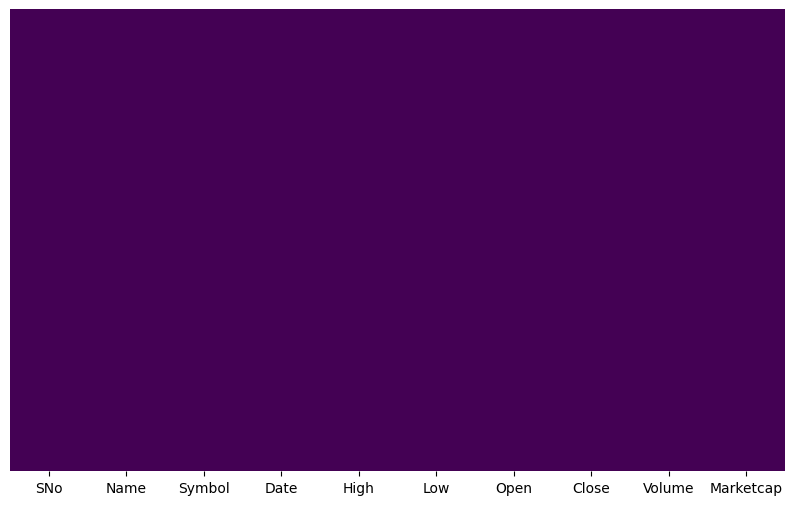

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

### Correlacion entre variables

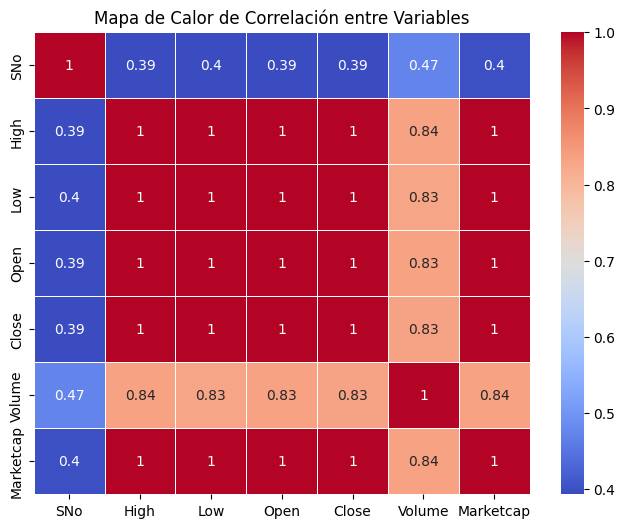

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

## Deteccion y eliminacion de valores atipicos
Histograma de precio criptomonedas

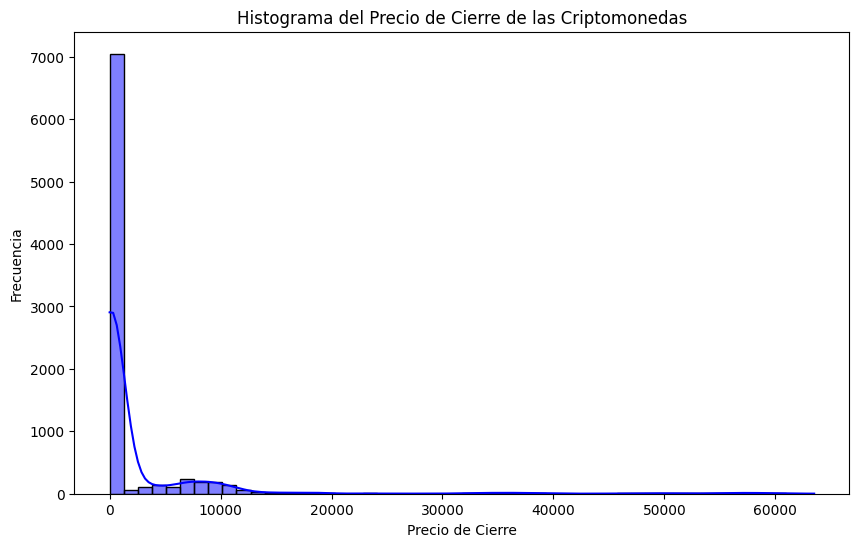

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

Calculamos el rango intercuartil para filtrar los valores extremos

In [9]:
Q1, Q3 = df['Close'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lim_inferior, lim_superior = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
print(f"Limite Inferior: {lim_inferior}, Limite Superior: {lim_superior}")

Limite Inferior: -664.9042277336121, Limite Superior: 1133.2193188667297


In [10]:
df[(df['Close'] < lim_inferior) | (df['Close'] > lim_superior)]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
219,220,Bitcoin,BTC,2013-12-04,1156.119995,1070.160034,1077.579956,1151.170044,0.000000e+00,1.390343e+10
1346,1347,Bitcoin,BTC,2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1.857187e+10
1396,1397,Bitcoin,BTC,2017-02-23,1176.619995,1116.959961,1117.270020,1166.719971,1.894540e+08,1.887744e+10
1397,1398,Bitcoin,BTC,2017-02-24,1200.390015,1131.959961,1172.709961,1173.680054,3.307590e+08,1.899242e+10
1398,1399,Bitcoin,BTC,2017-02-25,1174.849976,1124.589966,1170.410034,1143.839966,1.399610e+08,1.851191e+10
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


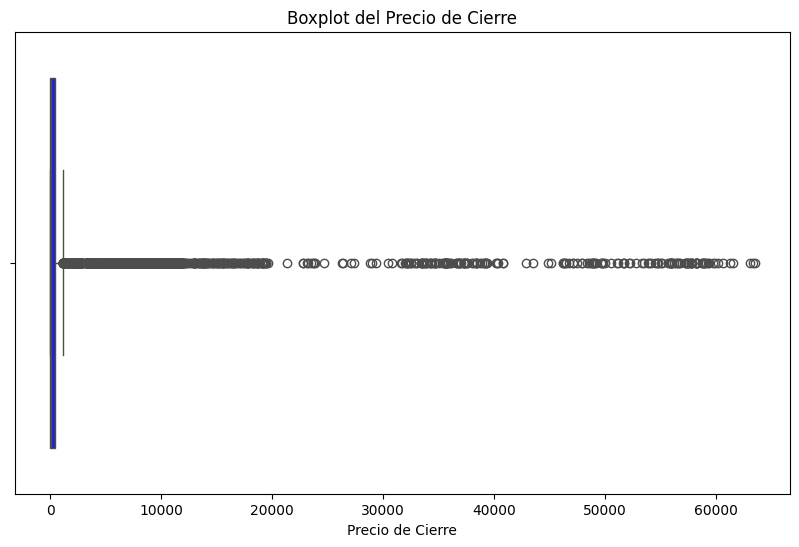

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'], color='blue')
plt.title('Boxplot del Precio de Cierre')
plt.xlabel('Precio de Cierre')
plt.show()

In [12]:
df = df[(df['Close'] >= lim_inferior) & (df['Close'] <= lim_superior)]

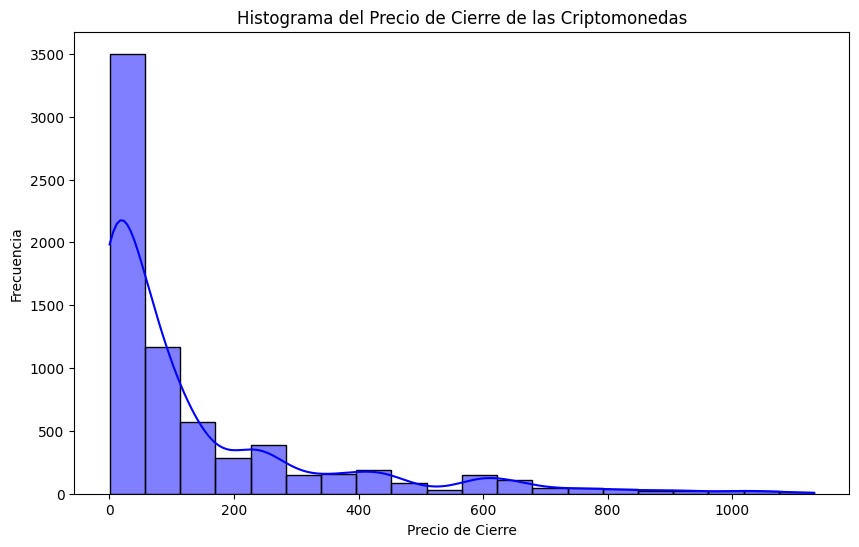

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

### Conversion a formato `Date`
Esto se hace con el proposito de realiza run analisis temporal mas adelante.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

datetime64[ns]


### Codificacion de variables categoricas
Usaremos One-Hot Encoding para convertir el nombre de las criptomonedas en variables binarias

In [15]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_crypto_name = encoder.fit_transform(df[['Name']])
name_columns = encoder.get_feature_names_out(['Name'])
encoded_df = pd.DataFrame(encoded_crypto_name, columns=name_columns)

df = df.reset_index(drop=True).join(encoded_df)
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Name_Bitcoin,Name_Litecoin,Name_Monero
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1.0,0.0,0.0
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1.0,0.0,0.0
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1.0,0.0,0.0
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1.0,0.0,0.0
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,2598,Monero,XMR,2021-07-02,211.666077,199.608531,206.252403,211.345143,1.519434e+08,3.792466e+09,0.0,0.0,1.0
7002,2599,Monero,XMR,2021-07-03,216.327967,207.042192,211.458163,214.752778,1.364141e+08,3.853768e+09,0.0,0.0,1.0
7003,2600,Monero,XMR,2021-07-04,224.909012,213.023069,214.839958,219.841418,1.697858e+08,3.945232e+09,0.0,0.0,1.0
7004,2601,Monero,XMR,2021-07-05,220.354191,206.502607,219.961957,214.464993,1.709852e+08,3.848898e+09,0.0,0.0,1.0


In [16]:
df = df.drop(columns=['Name'])
df.reset_index(drop=True, inplace=True)
df

,SNo,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Name_Bitcoin,Name_Litecoin,Name_Monero
0,1,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1.0,0.0,0.0
1,2,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1.0,0.0,0.0
2,3,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1.0,0.0,0.0
3,4,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1.0,0.0,0.0
4,5,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7001,2598,XMR,2021-07-02,211.666077,199.608531,206.252403,211.345143,1.519434e+08,3.792466e+09,0.0,0.0,1.0
7002,2599,XMR,2021-07-03,216.327967,207.042192,211.458163,214.752778,1.364141e+08,3.853768e+09,0.0,0.0,1.0
7003,2600,XMR,2021-07-04,224.909012,213.023069,214.839958,219.841418,1.697858e+08,3.945232e+09,0.0,0.0,1.0
7004,2601,XMR,2021-07-05,220.354191,206.502607,219.961957,214.464993,1.709852e+08,3.848898e+09,0.0,0.0,1.0


### Normalizacion de datos
Se normalizaran los datos con Z-Score, este tipo de normalizacion es mejor para manejar outliers y para el modelo de regresion lineal.
Antes de la normalizacion, veremos como esta distribuido el `Marketcap` a traves de un histograma.

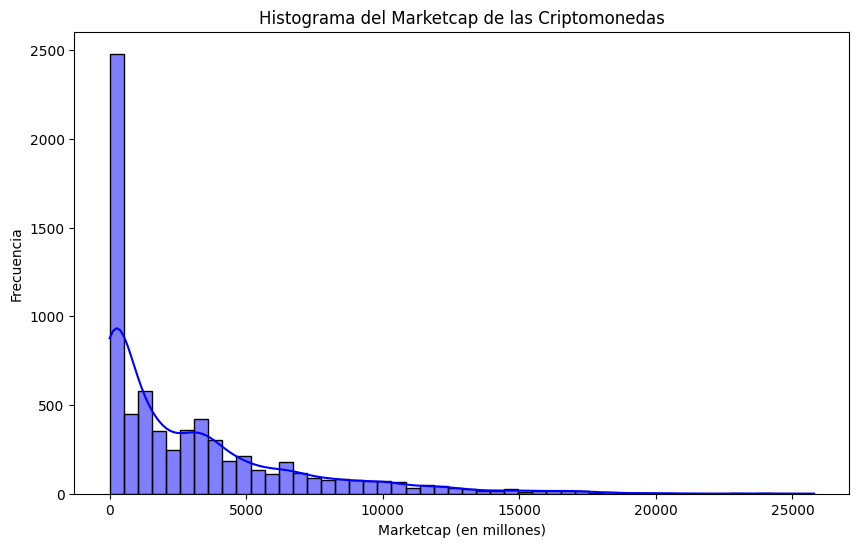

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketcap'] / 1e6, bins=50, kde=True, color='blue')  # Escala en millones
plt.title('Histograma del Marketcap de las Criptomonedas')
plt.xlabel('Marketcap (en millones)')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
#Normalizacion de datos
df.loc[:, 'Close'] = StandardScaler().fit_transform(df[['Close']])
df.loc[:, 'Marketcap'] = StandardScaler().fit_transform(df[['Marketcap']])

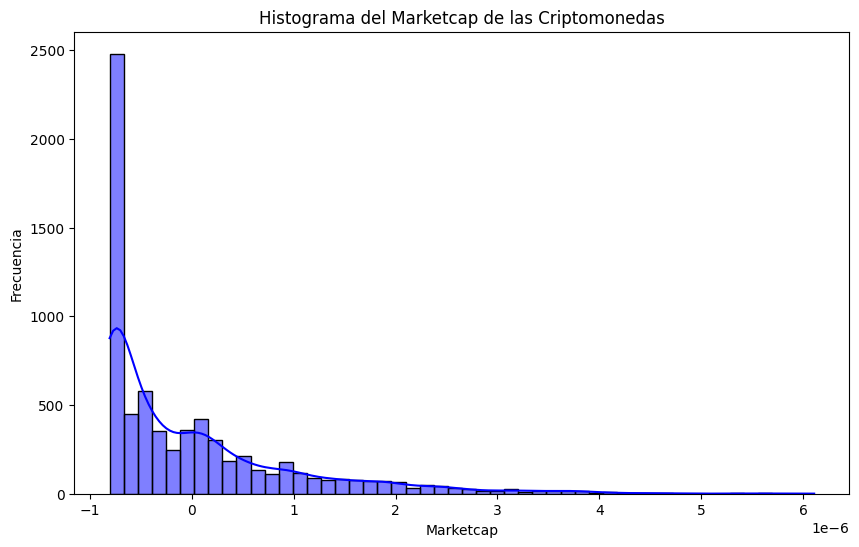

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketcap'] / 1e6, bins=50, kde=True, color='blue')  # Escala en millones
plt.title('Histograma del Marketcap de las Criptomonedas')
plt.xlabel('Marketcap')
plt.ylabel('Frecuencia')
plt.show()

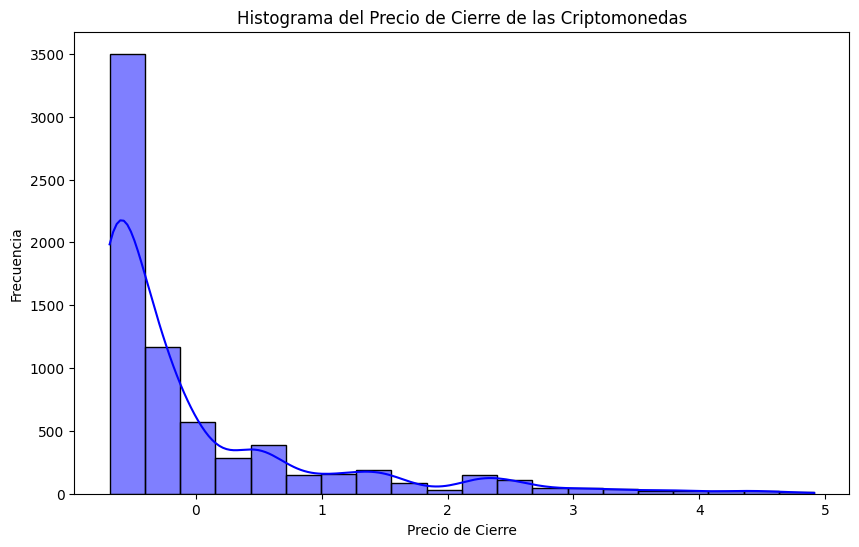

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

## Implementacion Regresion Lineal
La variable dependiente(Y) es `Close` y variable independiente(X) `Marketcap`.

Procesando regresión lineal para: Name_Bitcoin


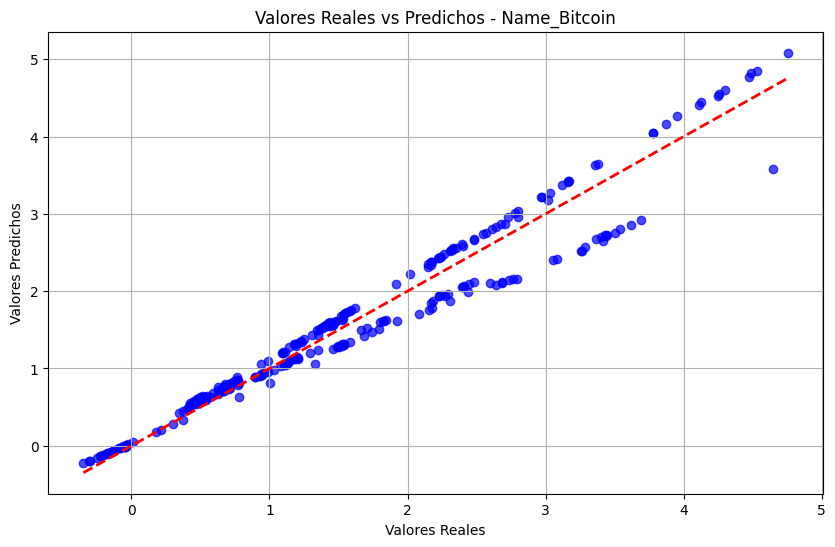

Resultados para Name_Bitcoin:
  Coeficientes: [1.16078044]
  Intercepto: 0.46829362997644686
  Error Cuadrático Medio: 0.06832179161459317
  R²: 0.9492893762760795
--------------------------------------------------
Procesando regresión lineal para: Name_Litecoin


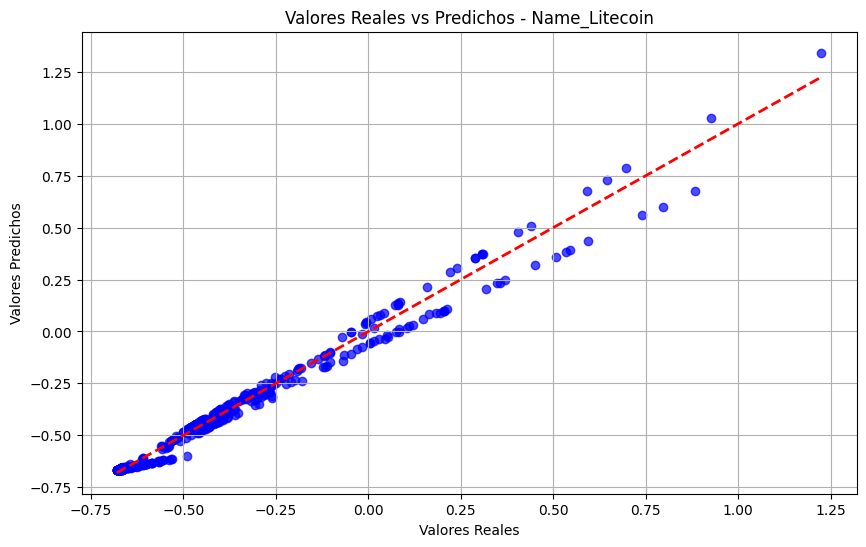

Resultados para Name_Litecoin:
  Coeficientes: [0.29158785]
  Intercepto: -0.43813790136922065
  Error Cuadrático Medio: 0.0013060507238393162
  R²: 0.985570438321987
--------------------------------------------------
Procesando regresión lineal para: Name_Monero


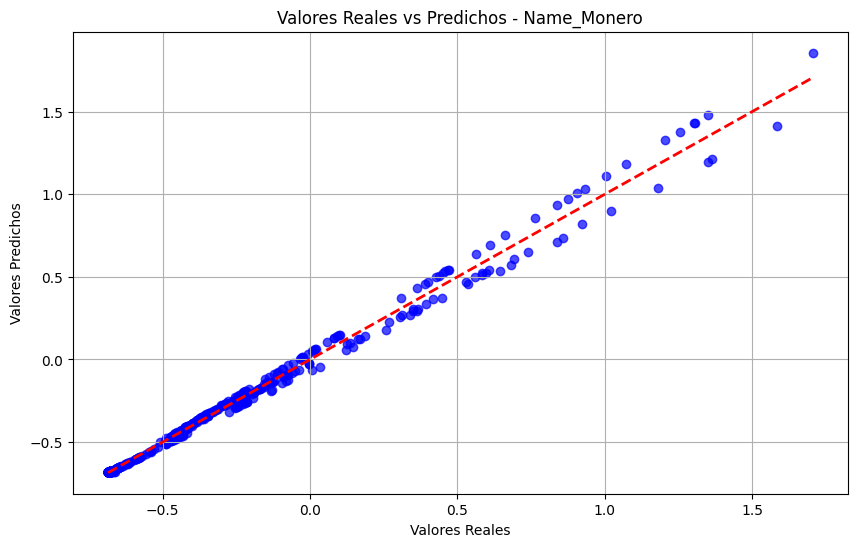

Resultados para Name_Monero:
  Coeficientes: [1.09482313]
  Intercepto: 0.19830094566157708
  Error Cuadrático Medio: 0.0012685178627300363
  R²: 0.9935234879971546
--------------------------------------------------


In [21]:
# Identificar las columnas dummies de las criptomonedas
crypto_columns = [col for col in df.columns if col.startswith('Name_')]

# Diccionario para almacenar resultados
linear_regression_results = {}

for crypto_col in crypto_columns:
    print(f"Procesando regresión lineal para: {crypto_col}")
    
    # Filtrar datos para la criptomoneda actual
    crypto_df = df[df[crypto_col] == 1]
    
    # Variables independientes y dependientes
    X = crypto_df[['Marketcap']]
    y = crypto_df['Close']
    
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Gráfico de valores reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"Valores Reales vs Predichos - {crypto_col}")
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.grid()
    plt.show()

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    linear_regression_results[crypto_col] = {
        'MSE': mse,
        'R2': r2
    }

    # Crear un DataFrame para almacenar los resultados de la regresión lineal
    linear_regression_df = pd.DataFrame.from_dict(linear_regression_results, orient='index')

    # Agregar una columna con el nombre del modelo
    linear_regression_df['Modelo'] = 'Regresión Lineal'
    
    print(f"Resultados para {crypto_col}:")
    print(f"  Coeficientes: {model.coef_}")
    print(f"  Intercepto: {model.intercept_}")
    print(f"  Error Cuadrático Medio: {mse}")
    print(f"  R²: {r2}")
    print("-" * 50)

## Implementacion LSTM (Long Short-Term Memory)


Las arquitecturas LSTM involucran la celda de memoria que está controlada por tres puertas: la puerta de entrada, la puerta de olvido y la puerta de salida. Estas puertas deciden qué información agregar, eliminar y emitir de la celda de memoria.

- Puerta de entrada: Controla qué información se agrega a la celda de memoria.  
- Puerta de olvido: Determina qué información se elimina de la celda de memoria.  
- Puerta de salida: Controla qué información se emite desde la celda de memoria.  

Esto permite que las redes LSTM retengan o descarten selectivamente la información a medida que fluye a través de la red, lo que les permite aprender las dependencias a largo plazo. La red tiene un estado oculto que es como su memoria a corto plazo. Esta memoria se actualiza utilizando la entrada actual, el estado oculto anterior y el estado actual de la celda de memoria.

Procesando predicciones para: Name_Bitcoin
Epoch 1/100


v:\Ciencia de Datos\Crypto-price-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0360 - val_loss: 0.0106
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0029 - val_loss: 0.0061
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0019 - val_loss: 0.0077
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0

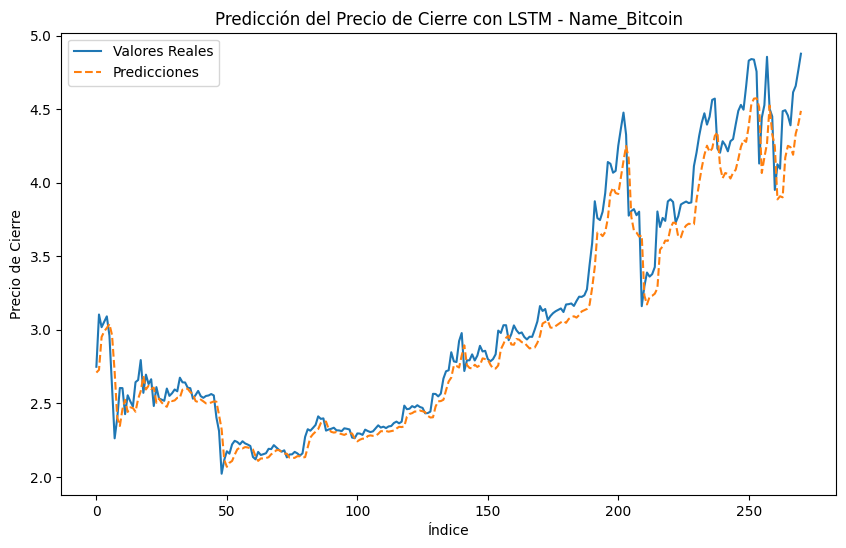

Métricas para Name_Bitcoin:
  MSE: 0.02946509275611529
  R²: 0.9536692368772521
--------------------------------------------------
Procesando predicciones para: Name_Litecoin
Epoch 1/100


v:\Ciencia de Datos\Crypto-price-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0076 - val_loss: 0.0027
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 8.2751e-04 - val_loss: 0.0018
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 9.5358e-04 - val_loss: 0.0018
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.7669e-04 - val_loss: 0.0012
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.3681e-04 - val_loss: 0.0010
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.0240e-04 - val_loss: 9.7881e-04
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.7054e-04 - val_loss: 9.3202e-04
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.0832e-04 - val_loss: 9.8591e-04
Epoch 12/100
74/74 ━━━━━

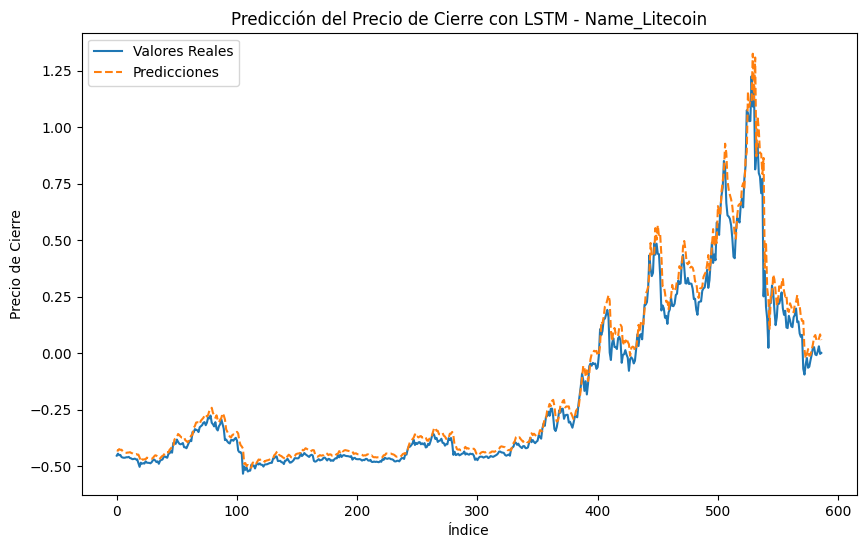

Métricas para Name_Litecoin:
  MSE: 0.004311915846401999
  R²: 0.9687849990340617
--------------------------------------------------
Procesando predicciones para: Name_Monero
Epoch 1/100


v:\Ciencia de Datos\Crypto-price-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0090 - val_loss: 0.0029
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 8.0121e-04 - val_loss: 0.0018
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 8.4726e-04 - val_loss: 0.0014
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 8.6730e-04 - val_loss: 0.0016
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.7913e-04 - val_loss: 0.0018
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/

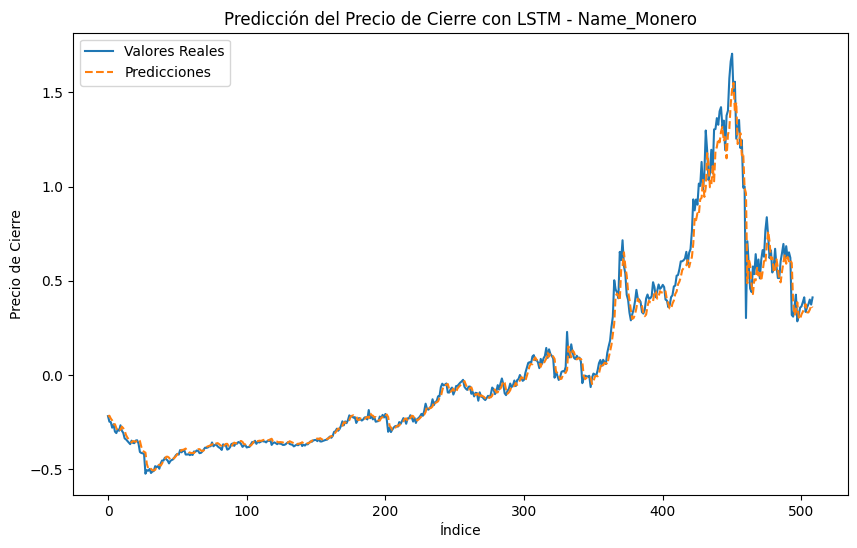

Métricas para Name_Monero:
  MSE: 0.004360646745215113
  R²: 0.9808164788920355
--------------------------------------------------


In [22]:
# Crear una lista de las criptomonedas (columnas codificadas)
crypto_columns = [col for col in df.columns if col.startswith('Name_')]

# Diccionario para almacenar resultados
lstm_results = {}

# Iterar sobre cada criptomoneda
for crypto_col in crypto_columns:
    print(f"Procesando predicciones para: {crypto_col}")
    
    # Filtrar los datos para la criptomoneda actual
    crypto_df = df[df[crypto_col] == 1].copy()
    
    # Ordenar por fecha
    crypto_df = crypto_df.sort_values(by='Date')
    
    # Normalizar la columna 'Close' para esta criptomoneda
    scaler = MinMaxScaler(feature_range=(0, 1))
    crypto_df['Close'] = scaler.fit_transform(crypto_df[['Close']])
    
    # Crear secuencias para LSTM
    def create_sequences(data, sequence_length):
        X, y = [], []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i + sequence_length])
            y.append(data[i + sequence_length])
        return np.array(X), np.array(y)
    
    sequence_length = 60  # Usar 60 días anteriores para predecir
    data = crypto_df['Close'].values
    X, y = create_sequences(data, sequence_length)
    
    # Dividir en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Redimensionar los datos para LSTM (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Crear el modelo LSTM
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))
    
    # Hacer predicciones
    predictions = model.predict(X_test)
    
    # Desescalar las predicciones y los valores reales
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calcular métricas
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Guardar resultados en el diccionario
    lstm_results[crypto_col] = {
        'MSE': mse,
        'R2': r2,
    }

    # Crear un DataFrame para almacenar los resultados de LSTM
    lstm_results_df = pd.DataFrame.from_dict(lstm_results, orient='index')
    
    # Agregar una columna con el nombre del modelo
    lstm_results_df['Modelo'] = 'LSTM'
    
    # Visualizar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label='Valores Reales')
    plt.plot(range(len(predictions)), predictions, label='Predicciones', linestyle='--')
    plt.legend()
    plt.title(f'Predicción del Precio de Cierre con LSTM - {crypto_col}')
    plt.xlabel('Índice')
    plt.ylabel('Precio de Cierre')
    plt.show()

    # Imprimir métricas
    print(f"Métricas para {crypto_col}:")
    print(f"  MSE: {mse}")
    print(f"  R²: {r2}")
    print("-" * 50)


# Implementación de XGBoost

En esta sección se implementa un modelo de regresión utilizando el algoritmo XGBoost para predecir el precio de cierre (`Close`) de distintas criptomonedas, utilizando como variable explicativa la capitalización de mercado (`Marketcap`).

Primero, se identifican todas las columnas del DataFrame que representan criptomonedas mediante variables dummy. Posteriormente, se recorre cada una de estas columnas y se realiza un entrenamiento individual de un modelo `XGBRegressor` para cada criptomoneda.

Para cada criptomoneda:
- Se filtran los datos correspondientes a esa moneda.
- Se define como variable independiente la capitalización de mercado (`Marketcap`) y como variable objetivo el precio de cierre (`Close`).
- Los datos se dividen en conjuntos de entrenamiento y prueba.
- Se entrena un modelo `XGBRegressor` con 100 estimadores y una función objetivo de error cuadrático (`reg:squarederror`).
- Se realizan predicciones sobre el conjunto de prueba.
- Se genera un gráfico que muestra la relación entre los valores reales y los valores predichos por el modelo, junto con una línea de referencia para evaluar visualmente la precisión del modelo.
- Se evalúa el desempeño del modelo utilizando el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
- Los resultados de cada modelo se almacenan en un diccionario para facilitar su comparación posterior.

Este enfoque permite analizar el rendimiento de XGBoost en la predicción del precio de cierre para cada criptomoneda por separado.


Procesando XGBoost para: Name_Bitcoin


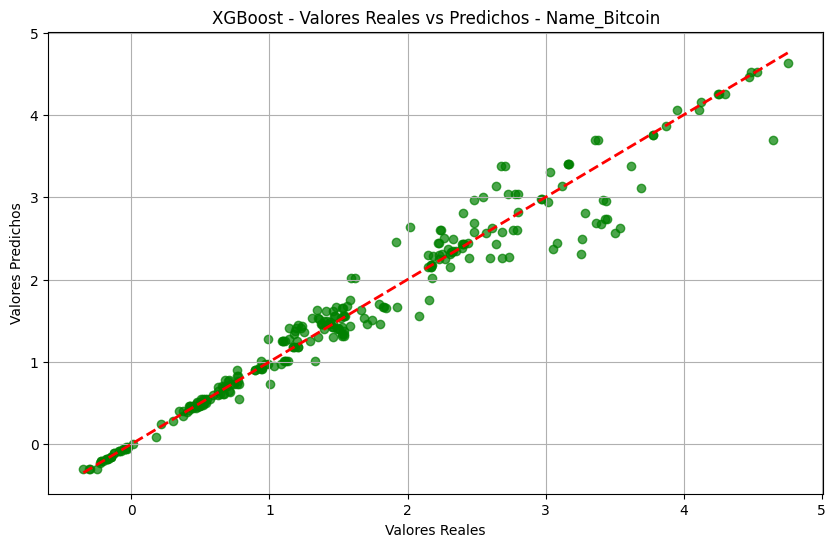

XGBoost - Resultados para Name_Bitcoin:
  Error Cuadrático Medio (MSE): 0.05440801894213744
  R²: 0.9596166243458207
Procesando XGBoost para: Name_Litecoin


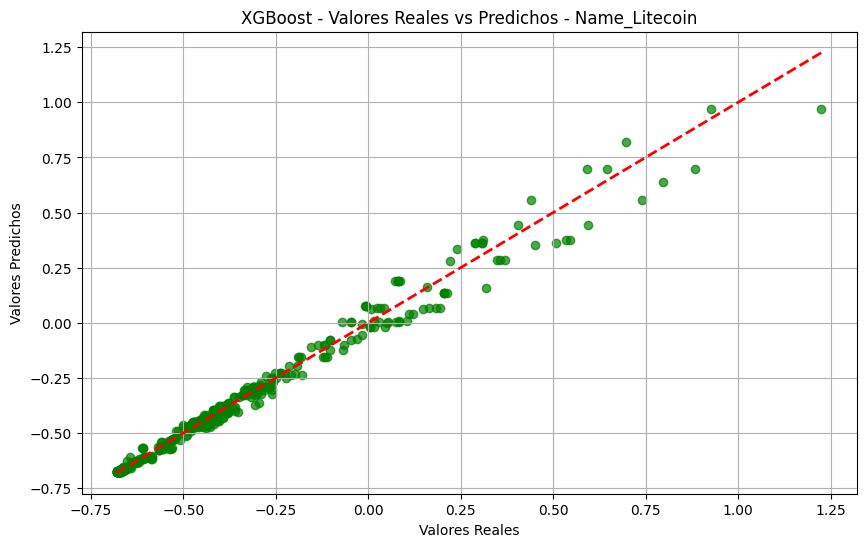

XGBoost - Resultados para Name_Litecoin:
  Error Cuadrático Medio (MSE): 0.001215920653282855
  R²: 0.9865662169609016
Procesando XGBoost para: Name_Monero


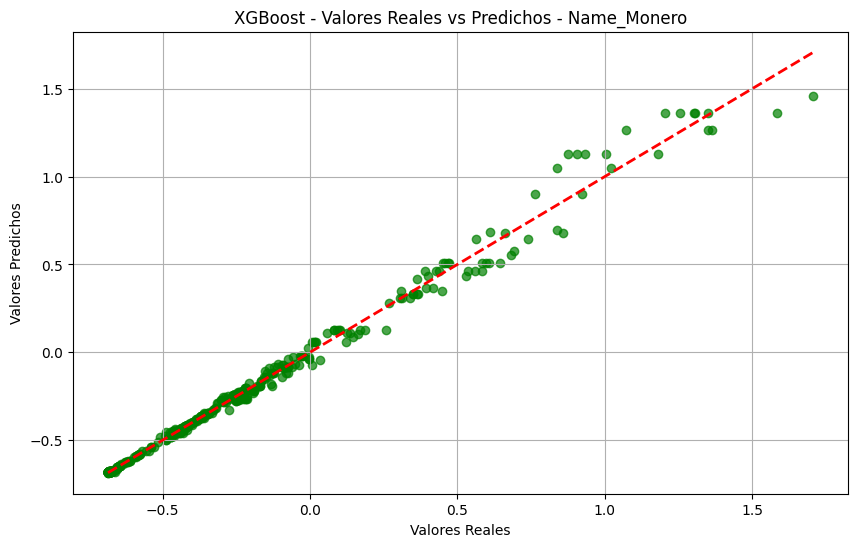

XGBoost - Resultados para Name_Monero:
  Error Cuadrático Medio (MSE): 0.0015454226512660622
  R²: 0.9921097300680867


In [23]:
# Identificar las columnas dummies de las criptomonedas (por si no las tienes cargadas)
crypto_columns = [col for col in df.columns if col.startswith('Name_')]

# Diccionario para almacenar resultados de XGBoost
xgb_results = {}

for crypto_col in crypto_columns:
    print(f"Procesando XGBoost para: {crypto_col}")
    
    # Filtrar datos para la criptomoneda actual
    crypto_df = df[df[crypto_col] == 1]
    
    # Variables independientes y dependientes
    X = crypto_df[['Marketcap']]
    y = crypto_df['Close']
    
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo XGBoost
    xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Predicciones
    y_xgb_pred = xgb_model.predict(X_test)
    
    # Gráfico de valores reales vs predichos - XGBoost
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_xgb_pred, alpha=0.7, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"XGBoost - Valores Reales vs Predichos - {crypto_col}")
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.grid()
    plt.show()
    
    # Evaluar el modelo
    xgb_mse = mean_squared_error(y_test, y_xgb_pred)
    xgb_r2 = r2_score(y_test, y_xgb_pred)
    
    # Guardar resultados
    xgb_results[crypto_col] = {
        'MSE': xgb_mse,
        'R2': xgb_r2
    }

    # Crear un DataFrame para almacenar los resultados de XGBoost
    xgb_results_df = pd.DataFrame.from_dict(xgb_results, orient='index')

    # Agregar una columna con el nombre del modelo
    xgb_results_df['Modelo'] = 'XGBoost'
    
    print(f"XGBoost - Resultados para {crypto_col}:")
    print(f"  Error Cuadrático Medio (MSE): {xgb_mse}")
    print(f"  R²: {xgb_r2}")
    print("=" * 50)


# Implementación de Random Forest

En esta sección se implementa un modelo de regresión utilizando Random Forest para predecir el precio de cierre (`Close`) de diversas criptomonedas a partir de su capitalización de mercado (`Marketcap`). Para ello, se parte de un conjunto de datos que contiene variables dummy asociadas al nombre de cada criptomoneda.

Primero, se identifican todas las columnas del DataFrame que representan criptomonedas mediante variables dummy. Luego, se itera sobre cada una de estas columnas para entrenar un modelo de Random Forest exclusivo para cada criptomoneda.

Para cada criptomoneda:
- Se filtran los datos correspondientes a ella.
- Se seleccionan las variables independientes (`Marketcap`) y la variable dependiente (`Close`).
- Se divide el conjunto de datos en entrenamiento y prueba.
- Se entrena un modelo `RandomForestRegressor` con 100 árboles de decisión.
- Se realizan predicciones sobre el conjunto de prueba.
- Se genera un gráfico de dispersión que compara los valores reales y los predichos, junto con una línea de referencia.
- Se evalúa el modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
- Se visualizan los tres primeros árboles del bosque, con una profundidad máxima de 2, para facilitar la interpretación de la lógica de decisión del modelo.

Los resultados obtenidos para cada criptomoneda se almacenan en un diccionario, permitiendo su posterior análisis y comparación.


Procesando Random Forest para: Name_Bitcoin


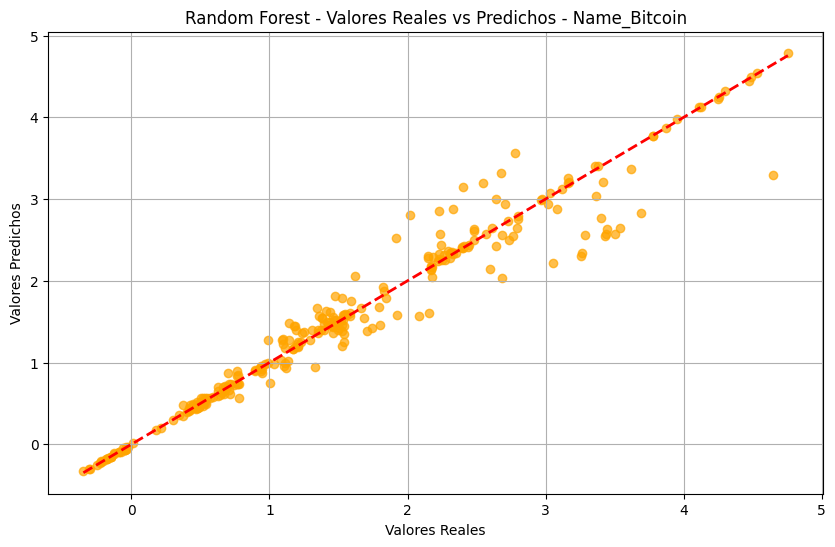

Random Forest - Resultados para Name_Bitcoin:
  Error Cuadrático Medio (MSE): 0.0642073037237182
  R²: 0.9523432810745336
Mostrando los primeros 3 árboles generados para Name_Bitcoin:


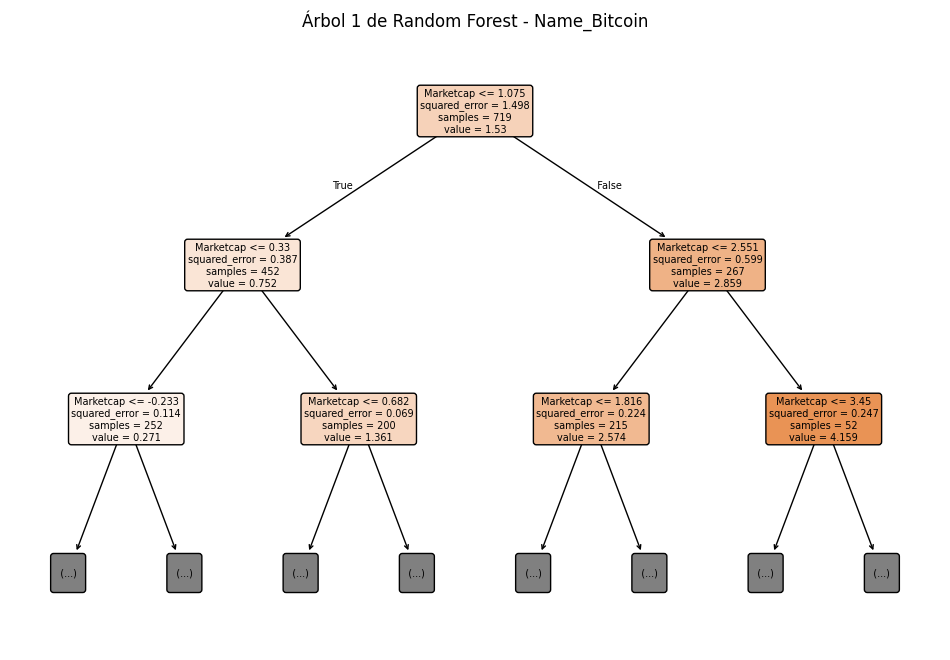

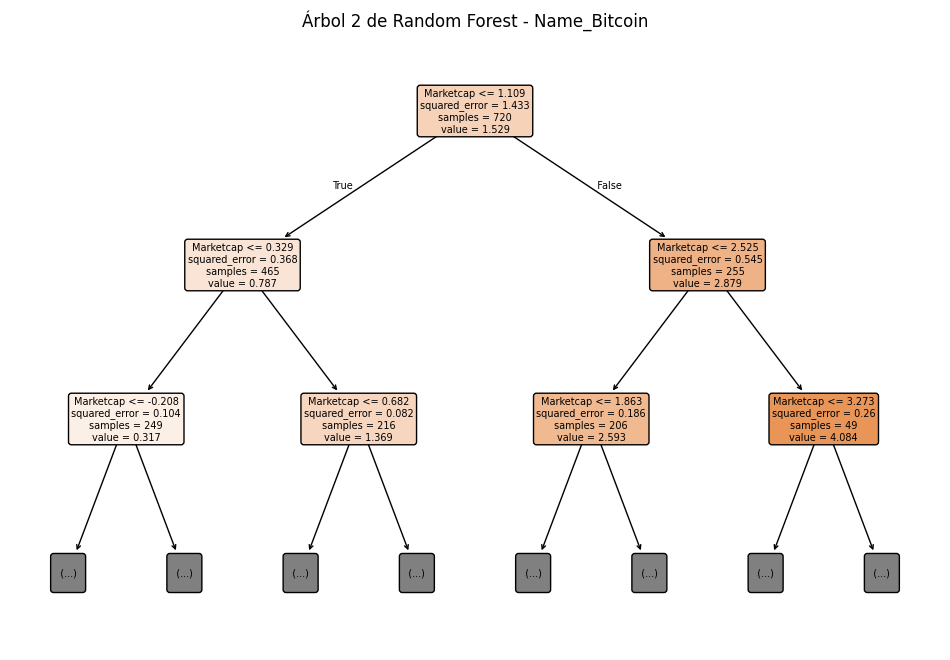

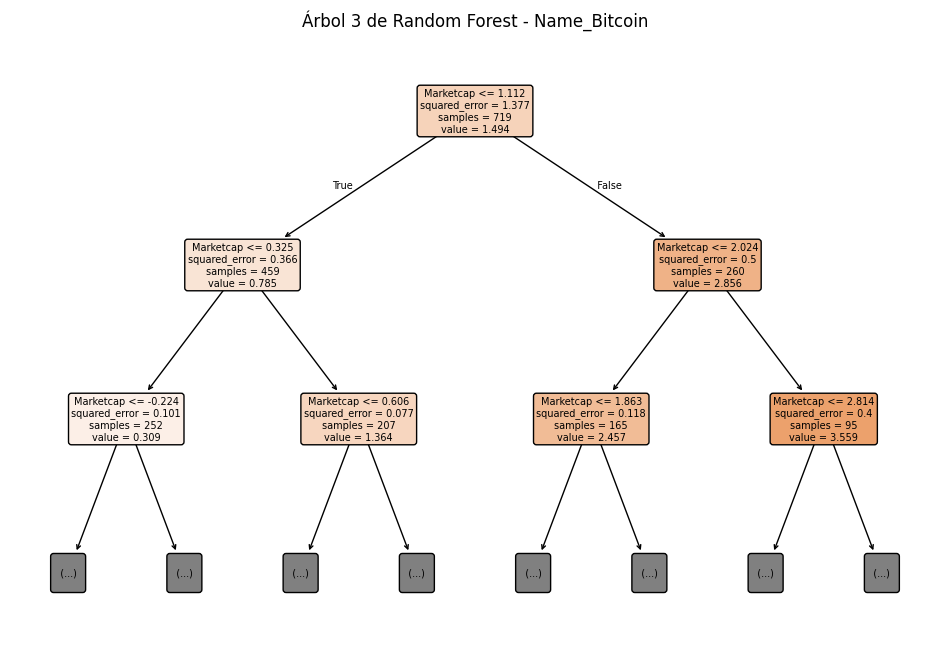

Procesando Random Forest para: Name_Litecoin


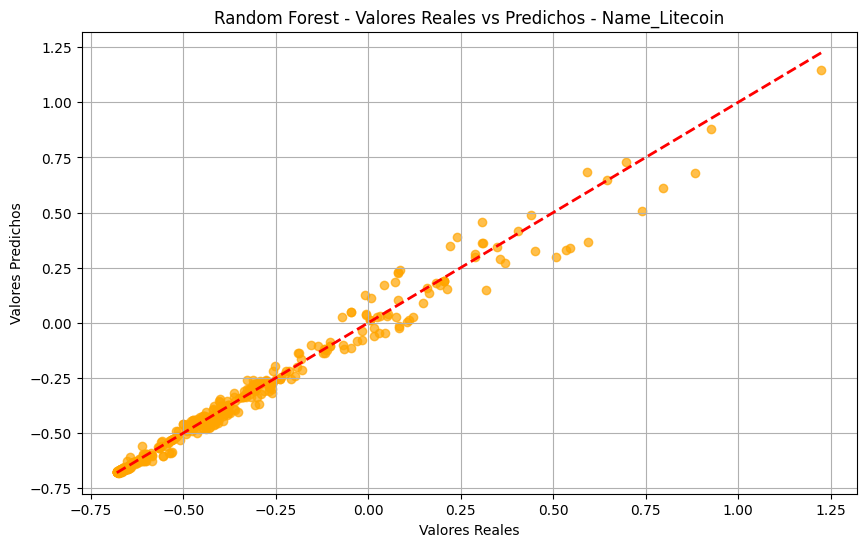

Random Forest - Resultados para Name_Litecoin:
  Error Cuadrático Medio (MSE): 0.0014542141606819284
  R²: 0.9839334931319395
Mostrando los primeros 3 árboles generados para Name_Litecoin:


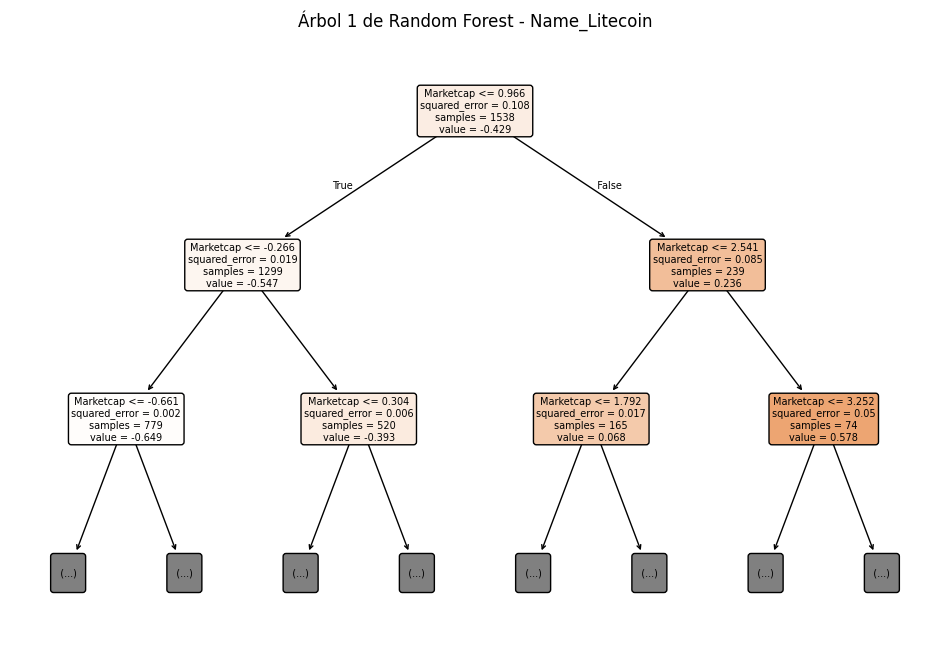

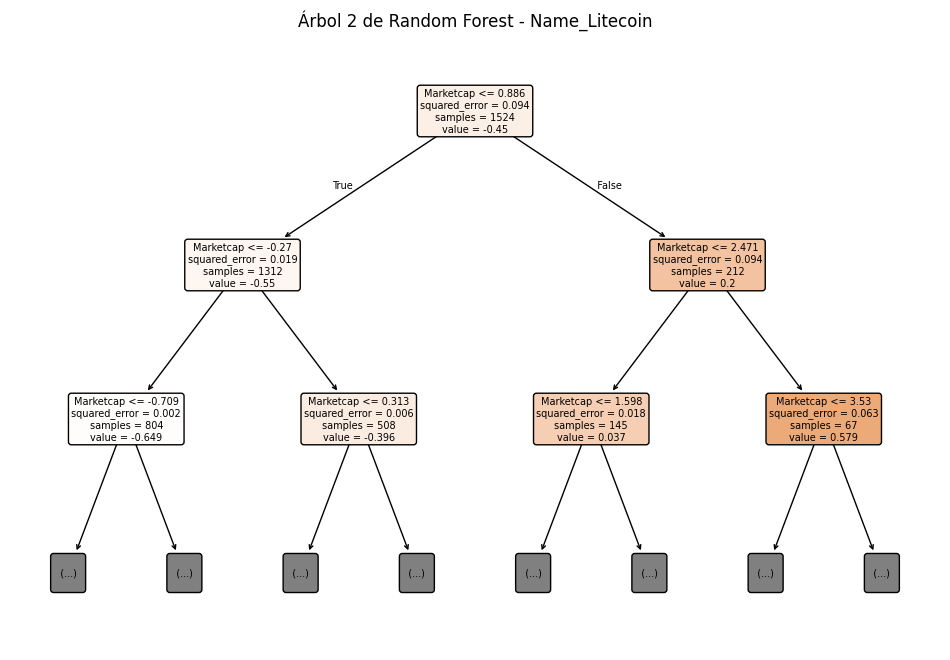

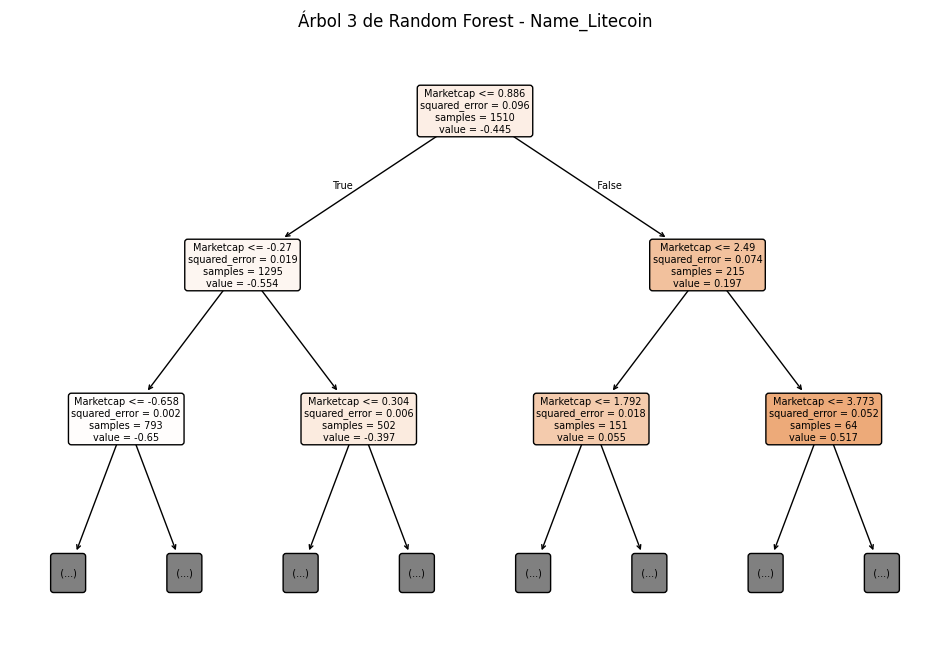

Procesando Random Forest para: Name_Monero


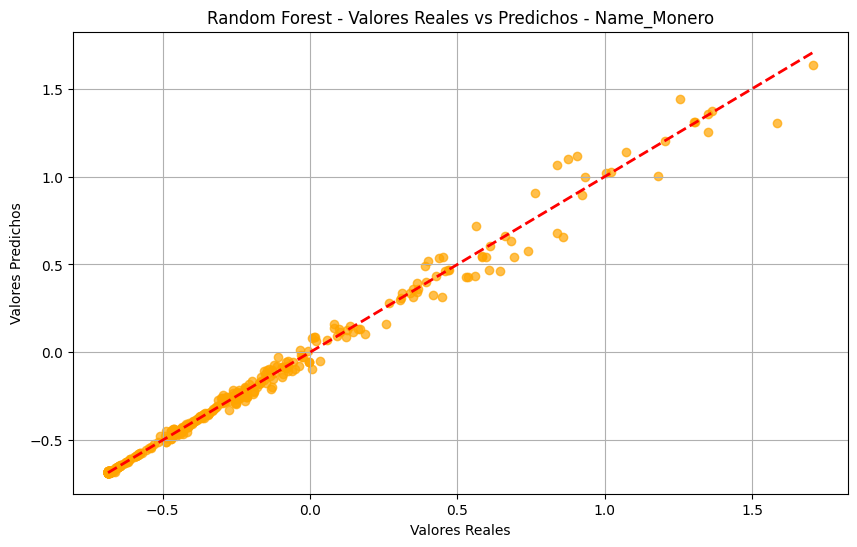

Random Forest - Resultados para Name_Monero:
  Error Cuadrático Medio (MSE): 0.0015836400824372062
  R²: 0.9919146081395983
Mostrando los primeros 3 árboles generados para Name_Monero:


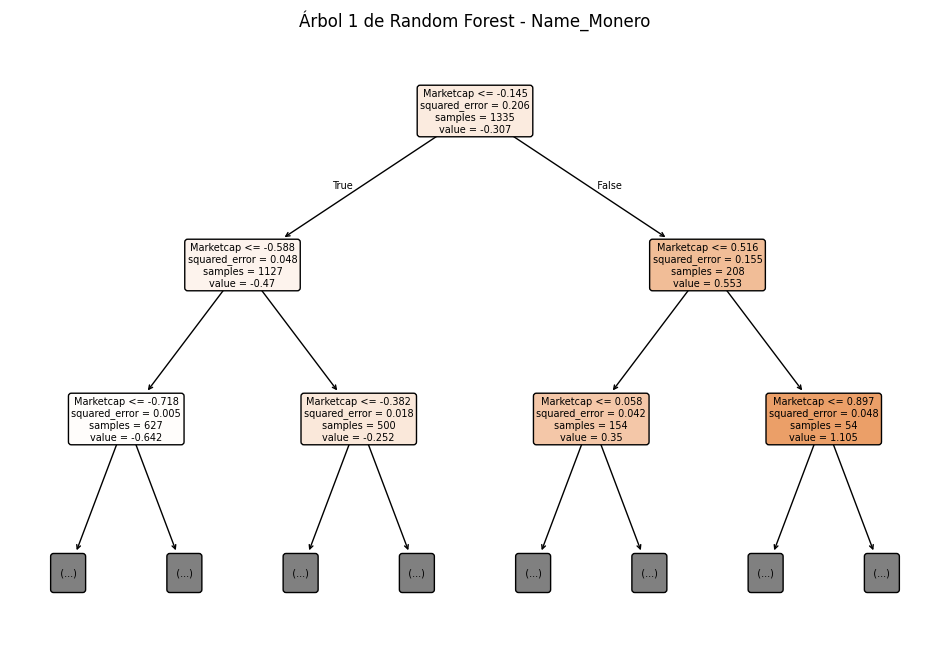

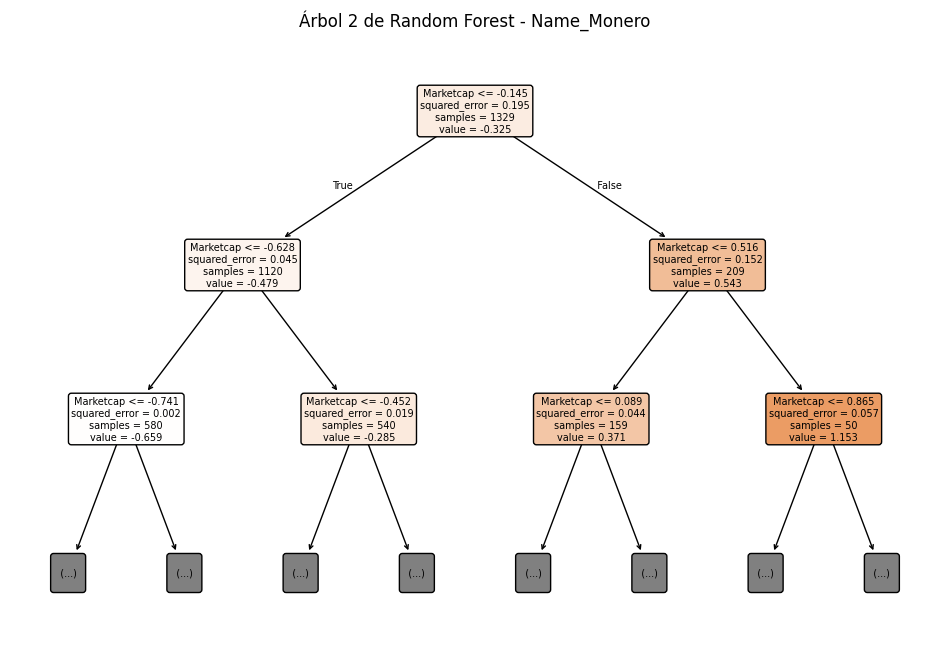

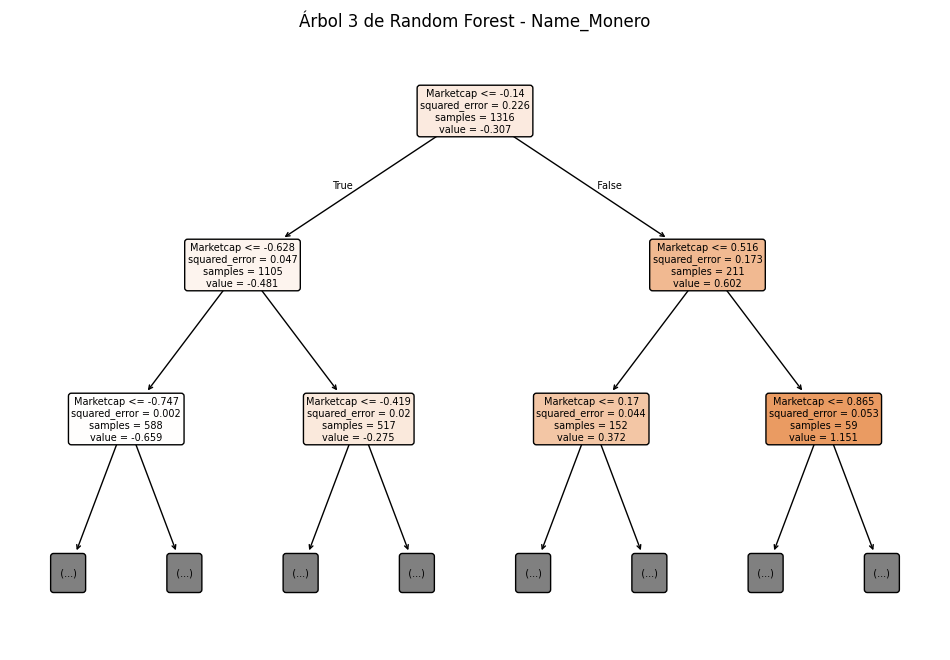

In [24]:
# Identificar las columnas dummies de las criptomonedas
crypto_columns = [col for col in df.columns if col.startswith('Name_')]

# Diccionario para almacenar resultados de Random Forest
rf_results = {}

for crypto_col in crypto_columns:
    print(f"Procesando Random Forest para: {crypto_col}")
    
    # Filtrar datos para la criptomoneda actual
    crypto_df = df[df[crypto_col] == 1]
    
    # Variables independientes y dependientes
    X = crypto_df[['Marketcap']]
    y = crypto_df['Close']
    
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predicciones
    y_rf_pred = rf_model.predict(X_test)
    
    # Gráfico de valores reales vs predichos - Random Forest
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_rf_pred, alpha=0.7, color='orange')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"Random Forest - Valores Reales vs Predichos - {crypto_col}")
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.grid()
    plt.show()
    
    # Evaluar el modelo
    rf_mse = mean_squared_error(y_test, y_rf_pred)
    rf_r2 = r2_score(y_test, y_rf_pred)
    
    # Guardar resultados
    rf_results[crypto_col] = {
        'MSE': rf_mse,
        'R2': rf_r2
    }

    # Crear un DataFrame para almacenar los resultados de Random Forest
    rf_results_df = pd.DataFrame.from_dict(rf_results, orient='index')

    # Agregar una columna con el nombre del modelo
    rf_results_df['Modelo'] = 'Random Forest'
    
    print(f"Random Forest - Resultados para {crypto_col}:")
    print(f"  Error Cuadrático Medio (MSE): {rf_mse}")
    print(f"  R²: {rf_r2}")
    
    # Imprimir los árboles del Random Forest
    print(f"Mostrando los primeros 3 árboles generados para {crypto_col}:")
    for i in range(3):
        plt.figure(figsize=(12,8))
        plot_tree(rf_model.estimators_[i], filled=True, feature_names=X.columns, rounded=True,max_depth=2)
        plt.title(f"Árbol {i+1} de Random Forest - {crypto_col}")
        plt.show()
    
    print("=" * 50)



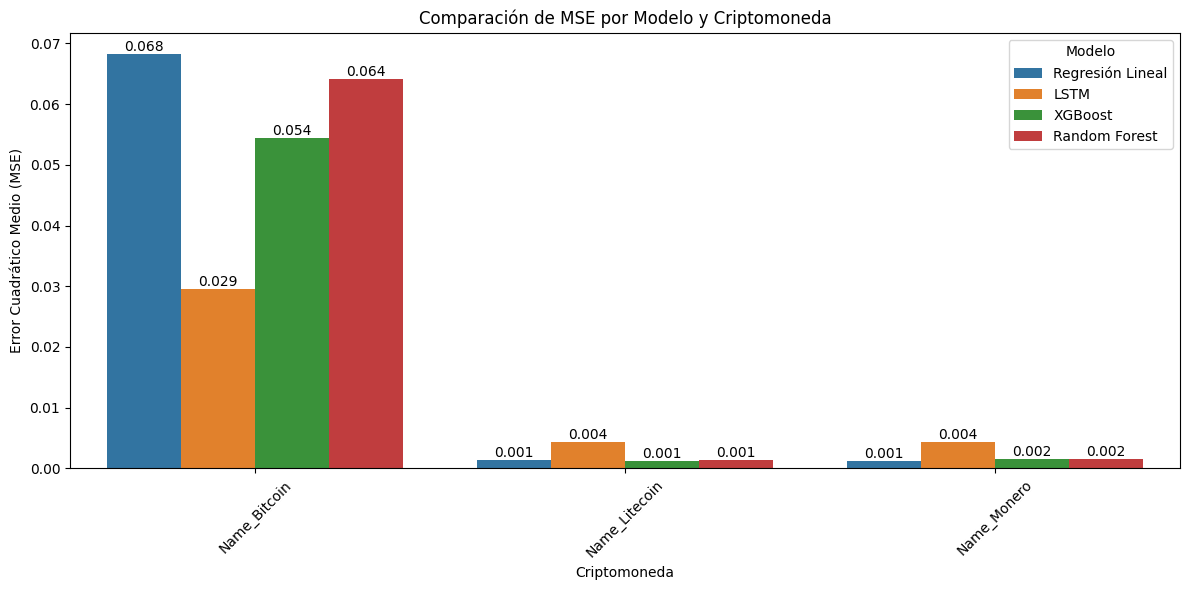

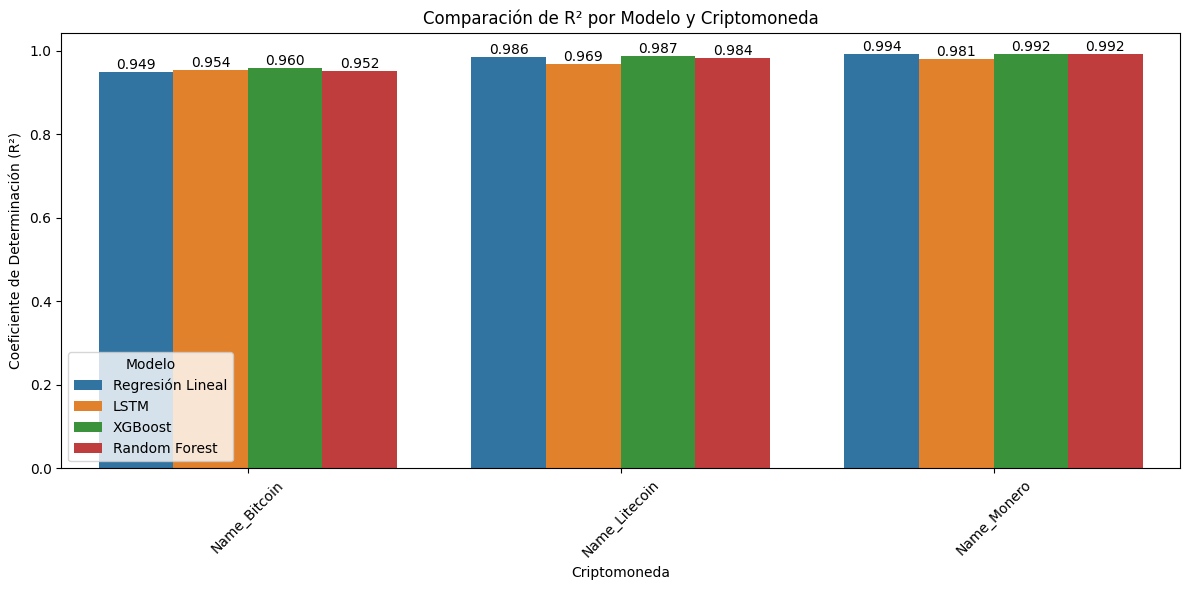

In [25]:
# Consolidar resultados de todos los modelos
all_results = []

# Agregar resultados de Regresión Lineal
for crypto, metrics in linear_regression_results.items():
    all_results.append({
        'Criptomoneda': crypto,
        'Modelo': 'Regresión Lineal',
        'MSE': metrics['MSE'],
        'R2': metrics['R2']
    })

# Agregar resultados de LSTM
for crypto, metrics in lstm_results.items():
    all_results.append({
        'Criptomoneda': crypto,
        'Modelo': 'LSTM',
        'MSE': metrics['MSE'],
        'R2': metrics['R2']
    })

# Agregar resultados de XGBoost
for crypto, metrics in xgb_results.items():
    all_results.append({
        'Criptomoneda': crypto,
        'Modelo': 'XGBoost',
        'MSE': metrics['MSE'],
        'R2': metrics['R2']
    })

# Agregar resultados de Random Forest
for crypto, metrics in rf_results.items():
    all_results.append({
        'Criptomoneda': crypto,
        'Modelo': 'Random Forest',
        'MSE': metrics['MSE'],
        'R2': metrics['R2']
    })

# Convertir a DataFrame
comparison_df = pd.DataFrame(all_results)

# Gráfico de comparación de MSE
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=comparison_df, x='Criptomoneda', y='MSE', hue='Modelo')
plt.title('Comparación de MSE por Modelo y Criptomoneda')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.xlabel('Criptomoneda')
plt.xticks(rotation=45)
plt.legend(title='Modelo')
plt.tight_layout()

# Agregar etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.show()

# Gráfico de comparación de R²
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=comparison_df, x='Criptomoneda', y='R2', hue='Modelo')
plt.title('Comparación de R² por Modelo y Criptomoneda')
plt.ylabel('Coeficiente de Determinación (R²)')
plt.xlabel('Criptomoneda')
plt.xticks(rotation=45)
plt.legend(title='Modelo')
plt.tight_layout()

# Agregar etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.show()

## Justificacion de los modelos seleccionados
- `LSTM`: Es ideal para datos secuenciales y temporales como los precios historicos de las criptomonedas, su forma de aprendizaje puede capturar dependencias a corto y largo plazo de los datos, esto es crucial para predecir tendencias futuras basadas en patrones historicos.  
- `XGBoost`: Es robusto frente a datos ruidosos, la capacidad de este modelo para manear datos faltantes lo hace adecuado para problemas como la prediccion de precios de criptomonedas.  
- `Random Forest`: Este modelo basado en arboles de decision utiliza bagging para reducir la varianza y mejorar la generalizacion, captura las relaciones no lineales y tiene una buena capacidad para manear datos con alta dimensionalidad.

## Conclusion y posibles mejoras
La combinacion de estos modelos nos da un punto de vista desde diferentes perspectivas, podemos ver como a pesar de las diferentes formas de aprendizaje y de implementacion que tienen estos modelos, pueden presentar un resultado bueno y similar entre ellos.  

En cuanto a las posibles mejoras, podriamos agregar mas variables como el volumen, la variacion porcentual diaria, el numero de holders, y entre otros datos para una posible mejor interpretacion y prediccion de los resultados en los modelos. Tambien agregar mas elementos como indicadores tecnicos(RSI, Medias Moviles, Etc). 